# 1) Data Preprocessing

In [1]:
import tensorflow as tf
print(tf.__version__)

2.4.1


# tensorflow.keras 무엇일까?

# 참고사이트-[http://melonicedlatte.com/machinelearning/2017/11/23/021658.html](http://melonicedlatte.com/machinelearning/2017/11/23/021658.html)



Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. It was developed with a focus on enabling fast experimentation. Being able to go from idea to result with the least possible delay is key to doing good research.
Use Keras if you need a deep learning library that:

Allows for easy and fast prototyping (through user friendliness, modularity, and extensibility).

Supports both convolutional networks and recurrent networks, as well as combinations of the two.

Runs seamlessly on CPU and GPU.



Keras는 파이썬으로 쓰이고, 텐서플로우, CNTK, Theano 등에서 사용가능한, 고수준의 neural networks API 입니다. 
Keras는 빠른 실험을 성취하기 위한 목적으로 개발되었습니다. 
가능한 지연을 최소화하면서 아이디어에서 결과로 갈 수 있다는 것이 좋은 연구를하는 핵심입니다.
딥러닝 라이브러리를 위한 Keras 사용 : 

    - 쉽고 빠른 프로토타이핑 가능 
    
    - convolutional 네트워크와 recurrent 네트워크를 지원하고, 두 개의 결합도 가능하다. 
    
    - CPU 및 GPU에서 원활하게 실행됩니다.

# spam.csv 파일 데이터는 아래 링크를 클릭하면 보실 수 있습니다.

# 링크 - [https://github.com/SEONGJAE-YOO/Natural-Language-Processing-NLP-in-Python-with-8-Projects/blob/main/data/spam.csv](https://github.com/SEONGJAE-YOO/Natural-Language-Processing-NLP-in-Python-with-8-Projects/blob/main/data/spam.csv)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
# 문장을 시퀀스 자료형으로 바꾸기 위한 라이브러리
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Embedding

# CNN 모델 만들기 위해 사용하는 라이브러리
from tensorflow.keras.models import Model

In [3]:
df = pd.read_csv('./data/spam.csv', encoding='ISO-8859-1')

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
# drop garbage columns
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)

In [6]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
# rename columns
df.columns = ['labels', 'data']

In [8]:
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df.shape

(5572, 2)

In [10]:
# create binary labels (0 and 1)
df['b_labels'] = df['labels'].map({'ham': 0, 'spam': 1}) # create new column as 'b_labels'
y = df['b_labels'].values

In [11]:
y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [12]:
# split the data
x_train, x_test, y_train, y_test = train_test_split(df['data'], y, test_size=0.33)

# 시퀀스 자료형이란? 

# 참고사이트- [https://velog.io/@suasue/Python-%EC%8B%9C%ED%80%80%EC%8A%A4-%EC%9E%90%EB%A3%8C%ED%98%95](https://velog.io/@suasue/Python-%EC%8B%9C%ED%80%80%EC%8A%A4-%EC%9E%90%EB%A3%8C%ED%98%95)


시퀀스 자료형(sequence types)이란 값이 연속적으로 이어진 자료형이다. 즉, 데이터에 순서(번호)를 붙여 나열한 것이다.
리스트, 튜플, range, 문자열을 주로 사용하며, bytes, bytearray라는 자료형도 있다.

시퀀스 자료형의 특징
데이터를 순서대로 하나씩 나열하여 나타낸 데이터 구조이므로 특정 위치(~번째)의 데이터를 가리킬 수 있다.

시퀀스 자료형으로 만든 객체를 시퀀스 객체라고 하며, 시퀀스 객체에 들어잇는 각 값을 요소(element)라고 부른다.

In [13]:
max_vocab_size = 20000
tokenizer = Tokenizer(num_words=max_vocab_size)

In [14]:
tokenizer.fit_on_texts(x_train)

In [15]:
sequences_train = tokenizer.texts_to_sequences(x_train)
sequences_test = tokenizer.texts_to_sequences(x_test)

In [16]:
x_train[0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [17]:
sequences_train[0] # 숫자로 이루어져있음

[93,
 159,
 65,
 10,
 182,
 12,
 234,
 225,
 424,
 15,
 471,
 45,
 21,
 116,
 1,
 32,
 472,
 11,
 376,
 135,
 2,
 94,
 3,
 248,
 69,
 7,
 1763,
 396]

In [18]:
len(sequences_train[0])

28

In [19]:
len(sequences_train[1])

20

In [20]:
# Convert sentences to sequences
max_vocab_size = 20000
tokenizer = Tokenizer(num_words=max_vocab_size)
tokenizer.fit_on_texts(x_train)
sequences_train = tokenizer.texts_to_sequences(x_train)
sequences_test = tokenizer.texts_to_sequences(x_test)

In [21]:
# Check word index mapping (to check the number of words in vocabulary)
word2idx = tokenizer.word_index
V = len(word2idx)
print('Total number of unique tokens are: %s' % V)

Total number of unique tokens are: 7226


# pad_sequence() 이란?

전체 훈련 데이터에서 각 샘플의 길이는 서로 다를 수 있습니다. 또는 각 문서 또는 각 문장은 단어의 수가 제각각입니다. 모델의 입력으로 사용하려면 모든 샘플의 길이를 동일하게 맞추어야할 때가 있습니다. 이를 자연어 처리에서는 패딩(padding) 작업이라고 하는데, 보통 숫자 0을 넣어서 길이가 다른 샘플들의 길이를 맞춰줍니다. 케라스에서는 pad_sequence()를 사용합니다. pad_sequence()는 정해준 길이보다 길이가 긴 샘플은 값을 일부 자르고, 정해준 길이보다 길이가 짧은 샘플은 값을 0으로 채웁니다.

pad_sequences([[1, 2, 3], [3, 4, 5, 6], [7, 8]], maxlen=3, padding='pre')

array([[1, 2, 3],
       [4, 5, 6],
       [0, 7, 8]], dtype=int32)

- 첫번째 인자 = 패딩을 진행할 데이터

maxlen = 모든 데이터에 대해서 정규화 할 길이

padding = 'pre'를 선택하면 앞에 0을 채우고 'post'를 선택하면 뒤에 0을 채움.

In [22]:
# pad sequences (to get  N x T matrix)
data_train = pad_sequences(sequences_train)
print('Shape of data train tensor:', data_train.shape)

# N: number of samples and T: Number of time steps

Shape of data train tensor: (3733, 189)


In [23]:
data_train[0]
len(data_train[0])

189

In [24]:
len(data_train[1])

189

In [25]:
# set the value of T to get sequence length
T = data_train.shape[1]

In [26]:
print(T)

189


In [27]:
# pad the test set
data_test = pad_sequences(sequences_test, maxlen=T)
# maxlen = T, to truncate longer sentences in test set
print('Shape of data test tensor:', data_test.shape)

Shape of data test tensor: (1839, 189)


# 2) Building the Model

#  CNN 알고리즘은 무엇일까? 

# 참고사이트 - [https://untitledtblog.tistory.com/150](https://untitledtblog.tistory.com/150)


CNN은 필터링 기법을 인공신경망에 적용함으로써 이미지를 더욱 효과적으로 처리하기 위해 (LeCun et al., 1989)에서 처음 소개되었으며, 이후에 (LeCun et al., 1998)에서 현재 딥 러닝에서 이용되고 있는 형태의 CNN이 제안되었다. 기존의 필터링 기법은 그림 1과 같이 고정된 필터를 이용하여 이미지를 처리했다. CNN의 기본 개념은 "행렬로 표현된 필터의 각 요소가 데이터 처리에 적합하도록 자동으로 학습되게 하자"는 것이다. 예를 들어, 이미지를 분류 알고리즘을 개발하고자 할 때 우리는 필터링 기법을 이용하여 분류 정확도 향상시킬 수 있을 것이다. 그러나 한 가지 문제점은 사람의 직관이나 반복적인 실험을 통해 알고리즘에 이용될 필터를 결정해야 한다는 것이다. 이러한 상황에서 CNN을 이용한다면, 알고리즘은 이미지 분류 정확도를 최대화하는 필터를 자동으로 학습할 수 있다.



2.1. CNN의 구조
일반적인 인공신경망은 그림 2와 같이 affine으로 명시된 fully-connected 연산과 ReLU와 같은 비선형 활성 함수 (nonlinear activation function)의 합성으로 정의된 계층을 여러 층 쌓은 구조이다.

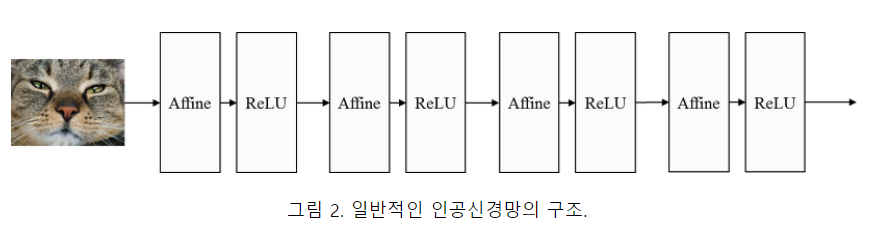

In [28]:
from IPython.display import Image  # 주피터 노트북에 이미지 삽입
Image("C://Users/MyCom/jupyter-tutorial/Natural Language Processing (NLP) in Python with 8 Projects/data/20211110_163303_1.png")

CNN은 그림 3과 같이 합성곱 계층 (convolutional layer)과 풀링 계층 (pooling layer)이라고 하는 새로운 층을 fully-connected 계층 이전에 추가함으로써 원본 이미지에 필터링 기법을 적용한 뒤에 필터링된 이미에 대해 분류 연산이 수행되도록 구성된다.

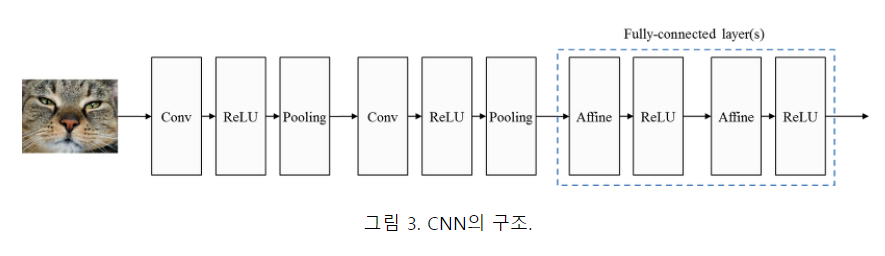

In [29]:
Image("C://Users/MyCom/jupyter-tutorial/Natural Language Processing (NLP) in Python with 8 Projects/data/20211110_163303_2.png")

합성곱 계층은 이미지에 필터링 기법이 적용하고, 풀링 계층은 이미지의 국소적인 부분들을 하나의 대표적인 스칼라 값으로 변환함으로써 이미지의 크기를 줄이는 등의 다양한 기능들을 수행한다.



# CNN 장점 

CNN의 가장 큰 장점은 매우 빠르다는 것이다. 합성곱 자체가 컴퓨터 그래픽의 핵심적인 부분이고 GPU단계에서 잘 동작한다. n-gram모델같은 것들과 비교해서 CNN은 단어 표현에 효율적이다. 단어사전이 굉장히 큰 경우 3-gram만 해도 비용이 급격하게 증가한다. 심지어 구글조차 5-gram이상의 것들은 제공하지 않는다. Convolutional Filter는 전체 단어 사전 없이도 자동으로 좋은 단어표현을 학습시킨다. 그리고 이 필터의 크기가 5보다 크더라도 문제가 되지 않는다. 첫 번째 레이어에서 학습된 많은 필터가 n-gram과 유사하다고 생각한다. 그러나 조금 간결한 방법으로 표현한다.

# CNN 개념 더 알기 

# 참고사이트 - [https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=superbag2010&logNo=220833722278](https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=superbag2010&logNo=220833722278)

(1) 개념 : 행렬에 적용되는 sliding window 함수.

아래 그림은 convolution 연산을 적용한 예시이다. Image는 흑백사진(0은 검은색, 1은 흰색)을 표현하며 각각이 하나의 픽셀을 나타낸다. Convolved Feature이 convolution 연산이 적용되어 feature가 추출된 결과이다. 노란색으로 표시된 부분이 필터가 적용되는 것을 보여주는 부분이다.

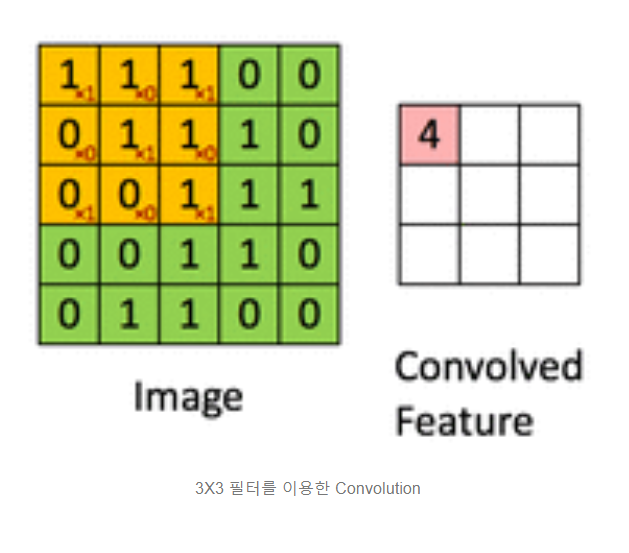

In [30]:
Image("C://Users/MyCom/jupyter-tutorial/Natural Language Processing (NLP) in Python with 8 Projects/data/20211110_170553_1.png")

(2) convolution의 역할

필터의 값을 어떻게 하는냐에 따라 역할이 조금씩 달라진다. 필터를 결정하여 어떤 특징을 추출할지 정하는 것이라고 보면 된다.

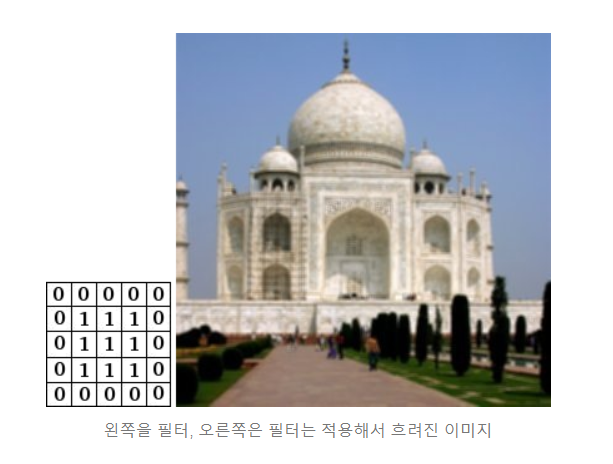

In [31]:
Image("C://Users/MyCom/jupyter-tutorial/Natural Language Processing (NLP) in Python with 8 Projects/data/20211110_172144_1.png")

(2)-2. 해당 픽셀과 주변과의 차이를 통해, 경계선을 찾아낸다.

예를 들어 색깔이 비슷한 곳은 필터를 적용했을 때 값이 0이 나올 것이고, 차이가 나는 곳(경계선) 차이가 클수록 값이 크게 나올 것이다

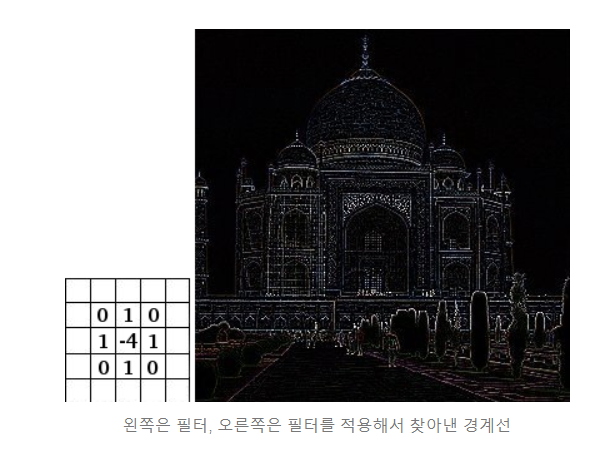

In [32]:
Image("C://Users/MyCom/jupyter-tutorial/Natural Language Processing (NLP) in Python with 8 Projects/data/20211110_172144_2.png")

2) Pooling

(1) 개념 : input에 대해서 부표본을 만든다(subsample).

보통 convolution layer 뒤에 적용된다. 예를 들면 아래와 같은 max operation이 있다. 2X2 필터로 2칸씩(stride size) 이동하며 max operation을 적용하였다. max 이외의 연산이 적용될 수도 있다. 특정 패턴을 찾는 연산이 적용될 경우, 회전된 이미지가 들어온다 하더라도 pooling 할 때 제대로 해당 패턴을 감지할 수 있다(회전된 이미지도 제대로 분류할 수 있다).

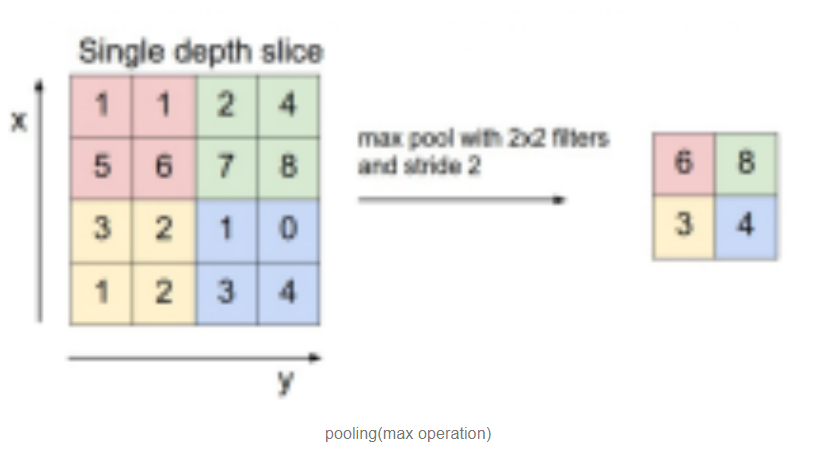

In [33]:
Image("C://Users/MyCom/jupyter-tutorial/Natural Language Processing (NLP) in Python with 8 Projects/data/20211110_172541_1.png")

# Embeddings 이란 무엇일까?

# 참고사이트 - [https://towardsdatascience.com/neural-network-embeddings-explained-4d028e6f0526](https://towardsdatascience.com/neural-network-embeddings-explained-4d028e6f0526)

An embedding is a mapping of a discrete — categorical — variable to a vector of continuous numbers. In the context of neural networks, embeddings are low-dimensional, learned continuous vector representations of discrete variables. Neural network embeddings are useful because they can reduce the dimensionality of categorical variables and meaningfully represent categories in the transformed space.

embedding은 연속 숫자벡터에 대한 범주형-변수의 매핑입니다. 신경망의 맥락에서, embedding은 이산 변수이면서 차원이 낮고 학습된 연속 벡터 표현입니다. 신경망 embedding은 범주변수의 차원을 줄이고 변형된 공간에서 범주를 의미 있게 나타낼 수 있기 때문에 유용합니다.


신경망 embedding에는 3가지 주요 목적이 있습니다.

1.Finding nearest neighbors in the embedding space. These can be used to make recommendations based on user interests or cluster categories.

2.As input to a machine learning model for a supervised task.

3.For visualization of concepts and relations between categories.

1.embedding 공간에서 가장 가까운 이웃을 찾고 사용자 관심사 또는 클러스터 범주에 기반 된 추천을 하도록 사용될 수 있습니다.

2.지도학습에 대한 기계 학습 모델에 대한 입력

3.개념의 시각화 및 범주 간의 관계.


This means in terms of the book project, using neural network embeddings, we can take all 37,000 book articles on Wikipedia and represent each one using only 50 numbers in a vector. 

Moreover, because embeddings are learned, books that are more similar in the context of our learning problem are closer to one another in the embedding space.

Neural network embeddings overcome the two limitations of a common method for representing categorical variables: one-hot encoding.

즉, 책 프로젝트의 관점에서 신경망 embeddings을 사용하여 위키백과에 대한 37,000권의 책 기사를 모두 가져올 수 있습니다. 그리고 벡터에 50개의 숫자만 사용하여 각 문서를 나타낼 수 있습니다. 

또한, embeddings을 학습 하였기 때문에, 학습 문제의 맥락에서 더 유사한 책은 embeddings 된 공간에서 서로 더 가깝습니다.

신경망 embeddings은 범주 변수인 원 핫 인코딩을 나타내는 일반적인 방법의 두 가지 제한을 극복합니다.

Limitations of One Hot Encoding

The operation of one-hot encoding categorical variables is actually a simple embedding where each category is mapped to a different vector. This process takes discrete entities and maps each observation to a vector of 0s and a single 1 signaling the specific category.

One Hot Encoding의 제한 사항

One Hot Encoding 범주 변수의 동작은 실제로 각 범주가 다른 벡터에 매핑되는 간단한 embedding입니다. 이 프로세스는 개별 엔터티를 취하고 0s의 벡터와 특정 범주의 신호를 나타내는 단일 1로 매핑합니다.

The one-hot encoding technique has two main drawbacks:

For high-cardinality variables — those with many unique categories — the dimensionality of the transformed vector becomes unmanageable.


The mapping is completely uninformed: “similar” categories are not placed closer to each other in embedding space.


높은 카디널리티 변수의 경우- 고유한 범주가 많은 변수는 변형된 벡터의 치수성을 관리할 수 없게 됩니다.

매핑은 완전히 알려지지 않습니다: "유사한" 범주는 포함 공간에 서로 더 가깝게 배치되지 않습니다


The first problem is well-understood: for each additional category — referred to as an entity — we have to add another number to the one-hot encoded vector. If we have 37,000 books on Wikipedia, then representing these requires a 37,000-dimensional vector for each book, which makes training any machine learning model on this representation infeasible.


첫 번째 문제는 잘 이해된다: 엔터티라고 하는 각 추가 범주에 대해 - 우리는  one-hot encoded된 벡터에 다른 숫자를 추가해야 합니다. 위키백과에 37,000권의 책이 있는 경우, 이를 나타내는 경우 각 책에 대해 37,000차원 벡터가 필요하며, 이로 인해 이 표현에 대한 모든 기계 학습 모델을 교육할 수 없습니다.

The second problem is equally limiting: one-hot encoding does not place similar entities closer to one another in vector space. If we measure similarity between vectors using the cosine distance, then after one-hot encoding, the similarity is 0 for every comparison between entities.

두 번째 문제는 똑같이 제한됩니다: one-hot encoding은 벡터 공간에서 유사한 엔터티를 서로 가까이 배치하지 않습니다. 코신 거리를 사용하는 벡터 간의 유사성을 측정하는 경우, one-hot encoding 한 후에 엔터티 간의 모든 비교에 대해 유사성은 0입니다.


This means that entities such as War and Peace and Anna Karenina (both classic books by Leo Tolstoy) are no closer to one another than War and Peace is to The Hitchhiker’s Guide to the Galaxy if we use one-hot encoding.

즉, 전쟁과 평화, 안나 카레니나(레오 톨스토이의 고전 책 모두)와 같은 엔티티들은 전쟁과 서로 더 가깝지 않으며, 평화는 우리가 one-hot encoding을 사용하는 경우, 히치하이커의 은하안내에 가깝습니다.



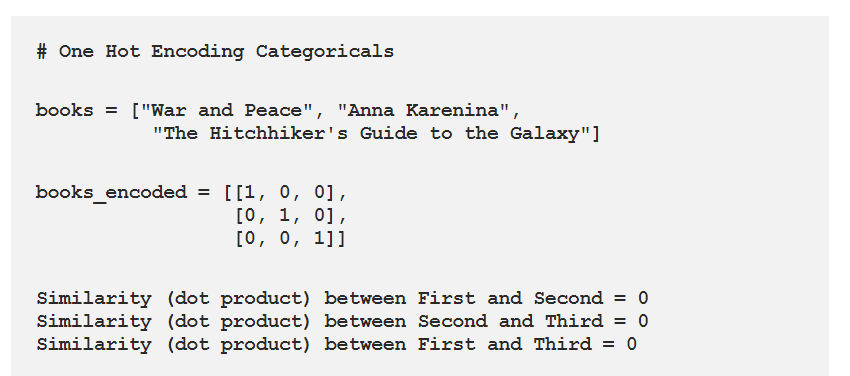

In [34]:
Image("C://Users/MyCom/jupyter-tutorial/Natural Language Processing (NLP) in Python with 8 Projects/data/20211110_181949_1.png")

Considering these two problems, the ideal solution for representing categorical variables would require fewer numbers than the number of unique categories and would place similar categories closer to one another.

이러한 두 가지 문제를 고려할 때 범주 변수를 나타내는 이상적인 해결방안은 고유 범주 수보다 적은 수가 필요하며 유사한 범주를 서로 가깝게 배치합니다.

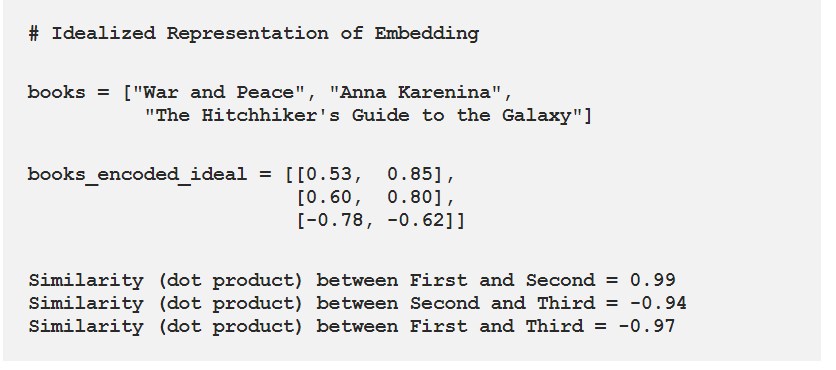

In [35]:
Image("C://Users/MyCom/jupyter-tutorial/Natural Language Processing (NLP) in Python with 8 Projects/data/20211110_181949_2.png")

To construct a better representation of categorical entities, we can use an embedding neural network and a supervised task to learn embeddings.

범주 엔티티들의 표현을 더 좋게 구성하려면, embedding 신경망을 사용하거나 embedding를 학습하는 지도학습을 사용하면 됩니다.

# keras embedding layer 구조 

# 참고사이트 - [https://medium.com/analytics-vidhya/understanding-embedding-layer-in-keras-bbe3ff1327ce](https://medium.com/analytics-vidhya/understanding-embedding-layer-in-keras-bbe3ff1327ce)

- We can create a simple Keras model by just adding an embedding layer.

model = Sequential()

embedding_layer = Embedding(input_dim=10,output_dim=4,input_length=2)

model.add(embedding_layer)

model.compile('adam','mse')

- There are three parameters to the embedding layer

1. input_dim : Size of the vocabulary

2. output_dim : Length of the vector for each word

3. input_length : Maximum length of a sequence

In [36]:
# Create the model

# CNN의 NLP 활용

# - 분류 문제에 강함 (ex) Sentiment Analysis, Spam Detection, Topic Categorization

# - convolution, pooling 레이어 때문에 단어 순서를 알 수 없게 되어 POS 태깅, Entitiy Extraction 등은 더 어려움

# - 입력 데이터는 word embedding, 각 행은 한 단어를 의미함 
# Choose embedding dimensionality
D = 20  # this is a hyper parameter, we can choose any word vector size that we want

# Input layer
i = Input(shape=(T,))  # input layer takes in sequences of integers, so shape is T


# Embedding layer
x = Embedding(V + 1, D)(i) # This takes in sequences of integers and returns sequences of word vectors
# This will be an N * T * D array
# we want size of embedding to (V + 1) x D, because first word index starts from 1 and not 0

# Conv1D Arguments

# 1. filters: Integer, the dimensionality of the output space (i.e. the number of output filters in the convolution).
# 2. kernel_size: An integer or tuple/list of a single integer, specifying the length of the 1D convolution window.
# 3. activation: Activation function to use. If you don't specify anything, no activation is applied ( see keras.activations).

#  First CNN layer
x = Conv1D(32, 3, activation='relu')(x) # filters,kernel_size,activation
x = MaxPooling1D(3)(x)

# Second CNN layer
x = Conv1D(64, 3, activation='relu')(x)
x = MaxPooling1D(3)(x)

# Third CNN layer
x = Conv1D(128, 3, activation='relu')(x)
x = GlobalMaxPooling1D()(x)

# Dense layer
x = Dense(1, activation='sigmoid')(x) #units =1  , sigmoid: 로지스틱 함수  , 참고사이트 - https://han-py.tistory.com/207

model = Model(i, x)

# 1D convolution layer 이란?

# 참고사이트-[https://keras.io/api/layers/convolution_layers/convolution1d/](https://keras.io/api/layers/convolution_layers/convolution1d/)

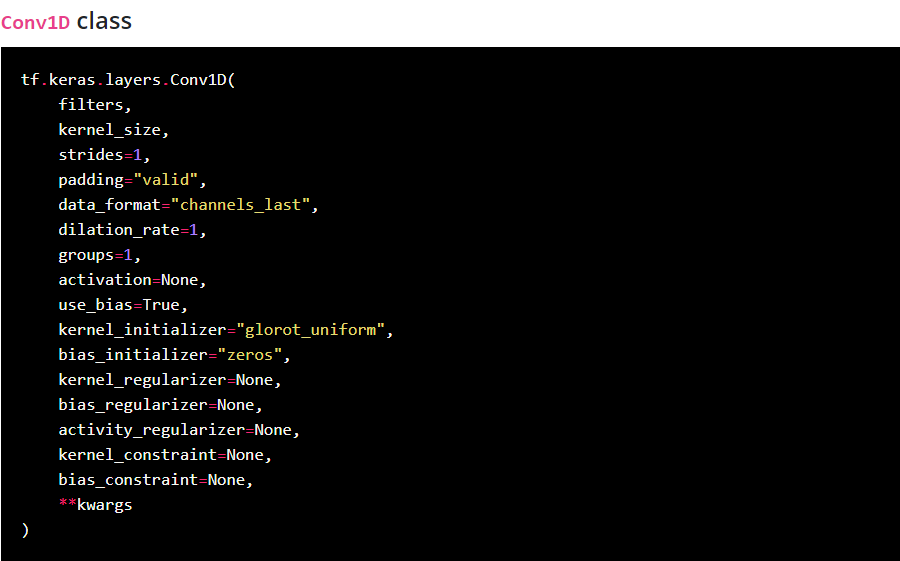

In [37]:
Image("C://Users/MyCom/jupyter-tutorial/Natural Language Processing (NLP) in Python with 8 Projects/data/20211110_185142_1.png")

# 1D convolution layer (e.g. temporal convolution).

This layer creates a convolution kernel that is convolved with the layer input over a single spatial (or temporal) dimension to produce a tensor of outputs. 

If use_bias is True, a bias vector is created and added to the outputs. Finally, if activation is not None, it is applied to the outputs as well.

이 layer는 출력 텐서를 생성하기 위해서 단일 공간(또는 임시) 차원에 대한 layer input으로 수렴된 컨볼루션 커널을 생성합니다. 

use_bias가 true인 경우 bias 벡터가 생성되고 출력에 추가됩니다. 
마지막으로 활동이 none이면, 출력에도 또한 적용됩니다.

.

When using this layer as the first layer in a model, provide an input_shape argument (tuple of integers or None, e.g. (10, 128) for sequences of 10 vectors of 128-dimensional vectors, or (None, 128) for variable-length sequences of 128-dimensional vectors.


첫 번째 layer로 사용하는 경우, 128차원 벡터의 10벡터의 시퀀스에 대해 input_shape 인수(예: 정수 또는 없음(예: 10, 128)를 128차원 벡터의 가변 길이 시퀀스를 제공한다.


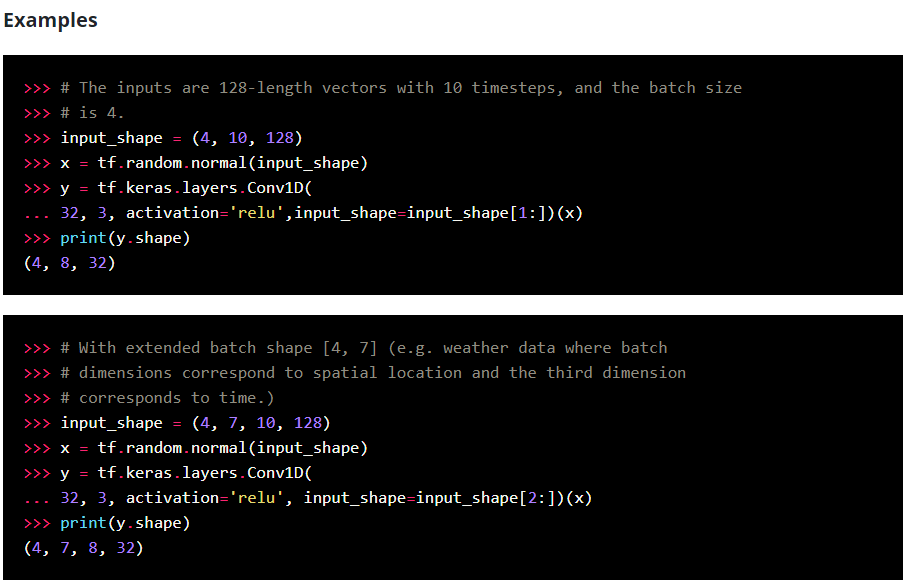

In [38]:
Image("C://Users/MyCom/jupyter-tutorial/Natural Language Processing (NLP) in Python with 8 Projects/data/20211110_185142_2.png")

# tf.keras.activations.relu

# 참고사이트 - [https://runebook.dev/ko/docs/tensorflow/keras/activations/relu](https://runebook.dev/ko/docs/tensorflow/keras/activations/relu)


tf.keras.activations.relu(
    x, alpha=0.0, max_value=None, threshold=0
)

- Arguments

x	: 입력 tensor 또는 variable .

alpha	 : 임계 값보다 낮은 값의 기울기를 제어 하는 float 입니다.

max_value	: 포화 임계 값 (함수가 반환 할 가장 큰 값)을 설정 하는 float 입니다.

threshold	: 값이 감쇠되거나 0으로 설정되는 활성화 함수의 임계 값을 제공 하는 float .


# tf.keras.Model 이란?

# 참고사이트 - [https://runebook.dev/ko/docs/tensorflow/keras/model](https://runebook.dev/ko/docs/tensorflow/keras/model)

Model 은 훈련 및 추론 기능을 사용하여 레이어를 객체로 그룹화합니다.

- compile()
모델 구성 후 complie() 메서드를 호출해서 모델 학습 과정을 설정한다
즉, 모델을 빌드하고 실행하기 전에 컴파일 하는 훈련 준비 단계로 생각하면 된다.

- keras.Model.compile()에는 세 개의 파라미터가 중요하다.

● loss : 최적화 과정에서 최소화될 손실함수를 설정하는 것으로, MSE(평균 제곱 오차)와 binary_crossentropy가 자주 사용된다

● optimizer : 훈련 과정을 설정하는 것으로, Adam, SGD 등이 있다

● metrics : 훈련을 모니터링하기 위해 사용한다


- example

model.compile(
    optimizer='rmsprop', loss=None, metrics=None, loss_weights=None,
    weighted_metrics=None, run_eagerly=None, steps_per_execution=None, **kwargs
)

- Arguments 

1. optimizer 종류

class Adadelta : Adadelta 알고리즘을 구현하는 최적화 프로그램.

class Adagrad : Adagrad 알고리즘을 구현하는 최적화 프로그램.

class Adam : Adam 알고리즘을 구현하는 Optimizer

class Adamax : Adamax 알고리즘을 구현하는 최적화 프로그램

class Ftrl : FTRL 알고리즘을 구현하는 옵티 마이저.

class Nadam Nadam : NAdam 알고리즘을 구현하는 최적화 프로그램.

class Optimizer : Keras 최적화 프로그램의 기본 클래스입니다.

class RMSprop : RMSprop 알고리즘을 구현하는 최적화 프로그램 ,경사하강법 보다 성능이 우수하다

class SGD : 경사 하강 법 (운동량 포함) 최적화 프로그램.

In [47]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# optimizer='adam' : Adam 알고리즘을 구현하는 Optimizer
#                    : Instantiate an optimizer.
 
# optimizers - usage with compile() and fit()
# 참고사이트 - https://keras.io/api/optimizers/

#  loss : 최적화 과정에서 최소화될 손실함수를 설정하는 것으로, MSE(평균 제곱 오차)와 binary_crossentropy가 자주 사용된다

# MSE - MSE가 크다는 것은 데이터와 평균 사이에 차이가 크다는 것 
#     - MSE가 작다는 것은 데이터와 평균 사이의 차이가 작다는 것 

# - 평균 제곱 오차 구하는 방법 - 
# 1. 평균을 구한다. 
# 2. 각 데이터에서 평균을 뺀 값에 제곱을 한다.
# 3. 2번에서 구한 값을 모두 더한다. 
# 4. 3번에서 구한 값에 총 데이터 숫자만큼 나눈다. 

#binary_crossentropy - 손실 함수의 종류로 Binary classification 즉 클래스가 두개 인 이진 분류 문제에서 사용
#                    - 시그모이드 (sigmoid) 함수 (마지막 레이어 활성화 함수)

#metrics - 평가 기준을 말한다. 평가 기준에는 모델의 학습에는 영향을 미치지 않지만, 학습 과정 중에 제대로 학습되고 있는 지 살펴볼 수 있다.
#        - 일반적으로 평가 기준을 accuracy으로 설정한다.
# 참고사이트 - https://tykimos.github.io/2017/09/24/Custom_Metric/

# 손실함수의 종류

# 참고사이트 - [https://cheris8.github.io/artificial%20intelligence/DL-Keras-Loss-Function/](https://cheris8.github.io/artificial%20intelligence/DL-Keras-Loss-Function/)

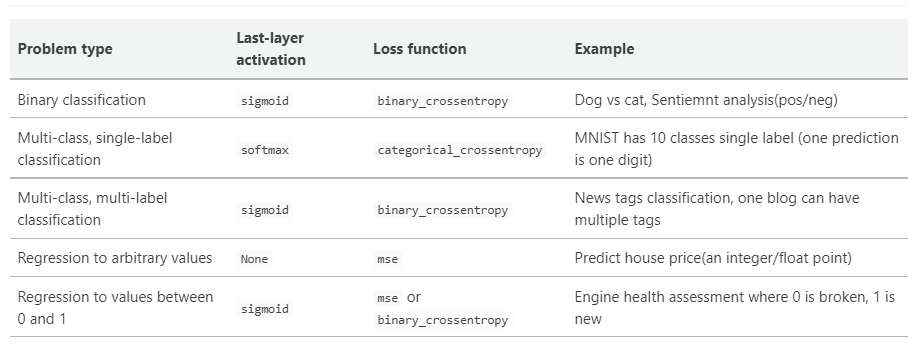

In [40]:
Image("C://Users/MyCom/jupyter-tutorial/Natural Language Processing (NLP) in Python with 8 Projects/data/20211111_133919_1.png")

# Adam Optimization Algorithm은 무엇일까?

# 참고사이트 - [https://velog.io/@minjung-s/Optimization-Algorithm](https://velog.io/@minjung-s/Optimization-Algorithm)



아담(Adam)은 Adaptive Moment Estimation의 약자입니다. 모멘텀과 RMSprop을 섞어놓은 최적화 알고리즘 입기 때문에, 딥러닝에서 가장 흔히 사용되는 최적화 알고리즘 입니다.

먼저 초기화를 진행하고, Momentum과 RMSprop에서 사용한 v와 S를 지정해줍니다.

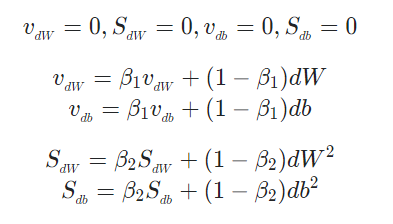

In [41]:
from IPython.display import Image  # 주피터 노트북에 이미지 삽입

Image("C://Users/MyCom/jupyter-tutorial/Natural Language Processing (NLP) in Python with 8 Projects/data/20211111_113511_1.png")

또한, Momentum에서 소개한 Bias correction을 해주어야 합니다.

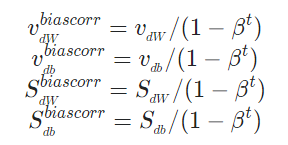

In [42]:
Image("C://Users/MyCom/jupyter-tutorial/Natural Language Processing (NLP) in Python with 8 Projects/data/20211111_113511_2.png")

마지막으로 Momentum과 RMSprop의 가중치 업데이트 방식을 모두 사용하여 가중치 업데이트를 진행합니다.



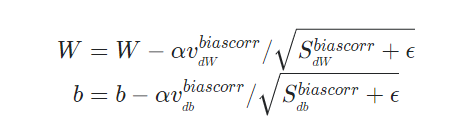

In [43]:
Image("C://Users/MyCom/jupyter-tutorial/Natural Language Processing (NLP) in Python with 8 Projects/data/20211111_113854_1.png")

- Adam의 하이퍼 파라미터

α : learning rate

β1 : 1차 moment, 대부분 0.9 (dw의 지수 가중 평균 계산 )

β2 : 2차 moment, 논문에서는 0.99 (dw2과 db2의 지수 가중 평균 계산)

ϵ : 논문에서는 0.10^{-8} (성능에 거의 영향 X)

# 코드

- tensorflow2.x

tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.99, epsilon=None)

# model.fit() 이란?

정해진 수의 세대에 걸쳐 모델을 학습시킵니다.(데이터셋에 대한 반복)

- example

fit(x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None, validation_split=0.0, validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, validation_steps=None)

- Arguments

1. x: 모델이 단일 인풋을 갖는 경우에는 라벨 데이터의 Numpy 배열 , 혹은 모델이 다중 아웃풋을 갖는 경우에는 Numpy 배열의 리스트로 정한다. 모델의 아웃풋 레이어에 이름이 명명된 경우는 아웃풋 이름을 Numpy 배열에 매핑하는 딕셔너리를 전달할 수도 있습니다. 프레임워크 네이티브 텐서(텐서플로우 데이터 텐서)를 전달받는 경우 x를 None(디폴트 값)으로 둘 수 있습니다.

2. y: 모델이 단일 인풋을 갖는 경우에는 라벨 데이터의 Numpy 배열 , 혹은 모델이 다중 아웃풋을 갖는 경우에는 Numpy 배열의 리스트로 정한다. 

3. batch_size : 정수 혹은 None. 디폴트 값 32이다. 한 번의 batch마다 주는 데이터 샘플의 size, iteration는 epoch를 나누어서 실행하는 횟수 

4. epochs : 정수 모델을 학습시킬 세대의 수, 한 세대는 제공된 모든 x와y 데이터에 대한 반복입니다. 모델은 epochs에 주어진 반복의 수만큼 학습되는 것이 아니라, 단지 epochs 색인의 세대에 도달 할 때까지만 학습됩니다.

5. validation_data: 각 세대의 끝에서 손실과 모델 측정항목을 평가할 (x_val, y_val) 튜플, 혹은 (x_val, y_val, val_sample_weights) 튜플. 모델은 이 데이터에 대해서는 학습되지 않습니다. validation_data는 validation_split에 대해 우선순위를 갖습니다.




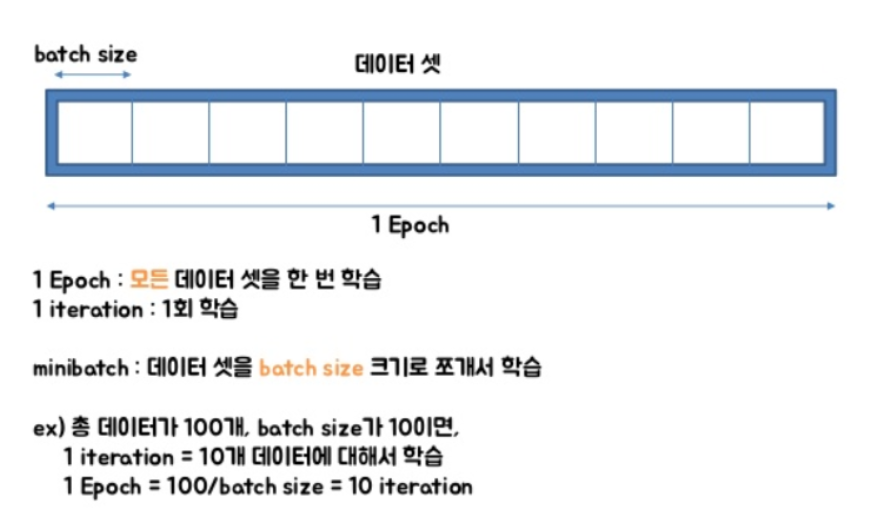

In [48]:
Image("C://Users/MyCom/jupyter-tutorial/Natural Language Processing (NLP) in Python with 8 Projects/data/20211111_141527_1.png")

In [44]:
# Train the model
# # epochs = 5이라면 전체 데이터를 5번 사용해서 학습을 거치는 것이다.
# ▶ 우리는 모델을 만들 때 적절한 epoch 값을 설정해야만 underfitting과 overfitting을 방지할 수 있습니다.
# epoch 값이 너무 작다면 underfitting이 너무 크다면 overfitting이 발생할 확률이 높은 것이죠.

r = model.fit(x=data_train, y=y_train, epochs=5, validation_data=(data_test, y_test))

Epoch 1/5
117/117 [==============================] - 4s 26ms/step - loss: 0.4781 - accuracy: 0.8566 - val_loss: 0.2561 - val_accuracy: 0.8766
Epoch 2/5
117/117 [==============================] - 1s 10ms/step - loss: 0.1792 - accuracy: 0.9108 - val_loss: 0.0978 - val_accuracy: 0.9761
Epoch 3/5
117/117 [==============================] - 1s 10ms/step - loss: 0.0181 - accuracy: 0.9952 - val_loss: 0.0760 - val_accuracy: 0.9859
Epoch 4/5
117/117 [==============================] - 1s 10ms/step - loss: 0.0046 - accuracy: 0.9995 - val_loss: 0.0889 - val_accuracy: 0.9853
Epoch 5/5
117/117 [==============================] - 1s 10ms/step - loss: 0.0028 - accuracy: 0.9999 - val_loss: 0.0882 - val_accuracy: 0.9864


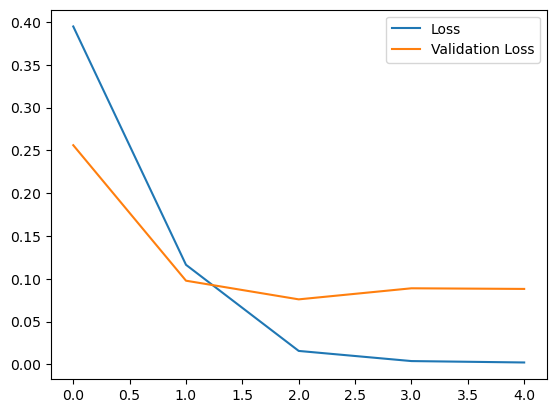

In [45]:
# Loss per iteration  
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

- 실행 결과입니다. 현재 사용하고 있는 노트PC의 GPU 성능이 낮아 GPU 가속을 받을 수 없는 상황이라 위와 같은 결과가 나왔습니다. 환경이 좋은데서는 epoch 값을 더 늘려서 좀 더 성능이 좋은 모델을 얻을 수 있을 것입니다

- epochs: 입력 데이터 학습 횟수

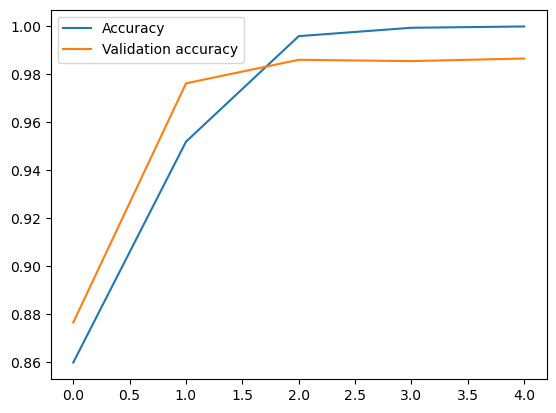

In [46]:
# Accuracy per iteration
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Validation accuracy')
plt.legend()
plt.show()